In [1]:
import pandas as pd
import numpy as np

In [2]:
dataSales = pd.read_excel("sales_data_sample.xlsx", header=0)

#dataSales = pd.read_excel("sales_data_sample.xlsx", engine="openpyxl", header=0)
#engine = 'openpyxl' ditambahkan jika muncul error "Excel xlsx file; notsupported"

dataSales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-02-12 00:00:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-01-03 00:00:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


## Visualisasi Data dengan Matplotlib

In [3]:
#mengambil data penjualan per tahun
SalesperYr = dataSales[['YEAR_ID', 'SALES']].groupby(['YEAR_ID'])['SALES'].sum().reset_index()
SalesperYr['YEAR_ID'] = SalesperYr['YEAR_ID'].astype('string')

In [4]:
import matplotlib.pyplot as plt

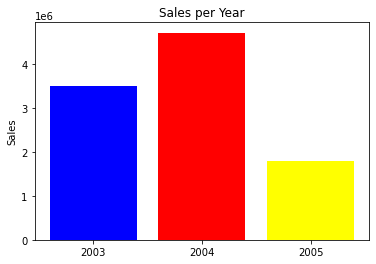

In [5]:
#menampilkan data penjualan per tahun dengan bar chart
plt.bar(SalesperYr['YEAR_ID'],SalesperYr['SALES'],color=('blue', 'red', 'yellow'))
plt.title('Sales per Year')
plt.ylabel('Sales')
plt.show()

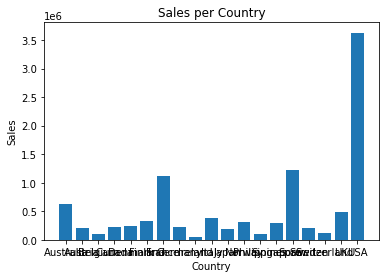

In [6]:
#menampilkan data penjualan per negara

SalesperCnt = dataSales[['COUNTRY', 'SALES']].groupby(['COUNTRY'])['SALES'].sum().reset_index()

plt.bar(SalesperCnt['COUNTRY'], SalesperCnt['SALES'])
plt.title('Sales per Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.show()

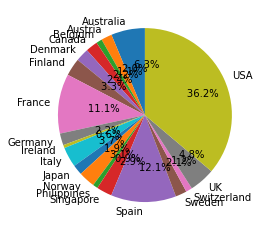

In [7]:
#menampilkan data dalam bentuk pie chart

plt.pie(SalesperCnt['SALES'], labels=SalesperCnt['COUNTRY'], autopct='%11.1f%%', startangle=90)
plt.show()

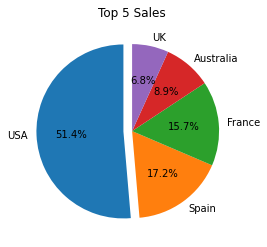

In [8]:
#menampilkan negara dengan top 5 sales

top5sales = SalesperCnt.nlargest(5, ['SALES'])

plt.pie(top5sales['SALES'], labels=top5sales['COUNTRY'], autopct='%1.1f%%', startangle=90, explode=(0.1,0,0,0,0))
plt.title('Top 5 Sales')
plt.show()

In [9]:
#mendapatkan data jumah sales per bulan

dataSales['MonthYear'] = pd.to_datetime(dataSales['YEAR_ID'].astype('string')+dataSales['MONTH_ID'].astype('string'), format='%Y%m')

SalesMY = dataSales[['MonthYear', 'SALES']].groupby(['MonthYear'])['SALES'].sum().reset_index()
SalesMY

,MonthYear,SALES
0,2003-01-01,129753.60
1,2003-02-01,140836.19
2,2003-03-01,174504.90
3,2003-04-01,201609.55
4,2003-05-01,192673.11
5,2003-06-01,168082.56
6,2003-07-01,187731.88
7,2003-08-01,197809.30
8,2003-09-01,263973.36
9,2003-10-01,568290.97


Text(0.5, 0, 'Month-Year')

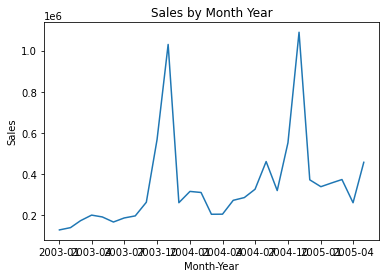

In [10]:
#menampilkan tingkat sales per bulan menggunakan line chart

plt.plot(SalesMY['MonthYear'],SalesMY['SALES'])
plt.title('Sales by Month Year')
plt.ylabel('Sales')
plt.xlabel('Month-Year')

C:\Users\Rendy\AppData\Local\Temp\ipykernel_15880\233224752.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


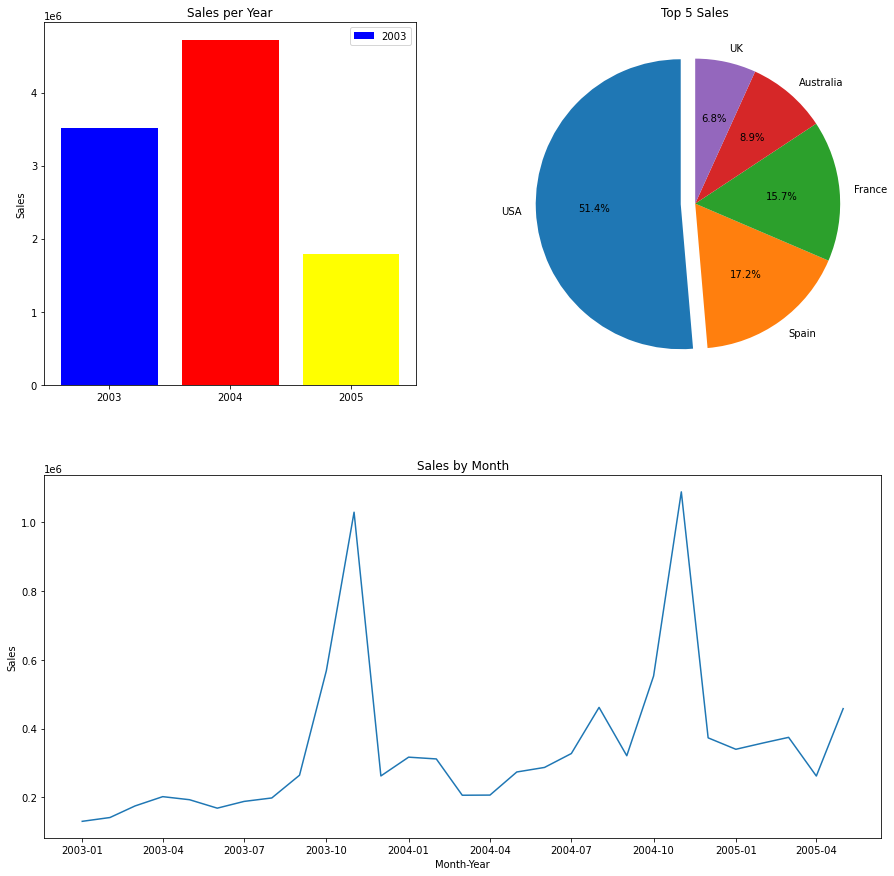

In [11]:
#menampilkan beberapa chart dan mengatur posisi tampilan chart

fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

#bar chart
ax1 = fig.add_subplot(2,2,1)
ax1.bar(SalesperYr['YEAR_ID'], SalesperYr['SALES'], color=('blue', 'red', 'yellow'))
ax1.set_title('Sales per Year')
ax1.set_ylabel('Sales')
ax1.legend(labels=SalesperYr['YEAR_ID'])

#pie chart
ax2 = fig.add_subplot(2,2,2)
ax2.pie(top5sales['SALES'], labels=top5sales['COUNTRY'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0, 0))
ax2.set_title('Top 5 Sales')

#line chart
ax3 = fig.add_subplot(2,2,(3,4))
ax3.plot(SalesMY['MonthYear'], SalesMY['SALES'])
ax3.set_ylabel('Sales')
ax3.set_xlabel('Month-Year')
ax3.set_title('Sales by Month')

fig.show()

## Challenge

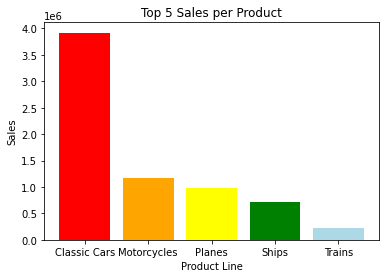

In [12]:
#mengambil 5 data penjualan terbanyak berdasarkan productline
SalesperProductline = dataSales[['PRODUCTLINE', 'SALES']].groupby(['PRODUCTLINE'])['SALES'].sum().reset_index().head(5)

#menampilkan data penjualan per produk dengan bar chart
plt.bar(SalesperProductline['PRODUCTLINE'], SalesperProductline['SALES'], color=('red', 'orange', 'yellow', 'green', 'lightblue'))
plt.title('Top 5 Sales per Product')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()